In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


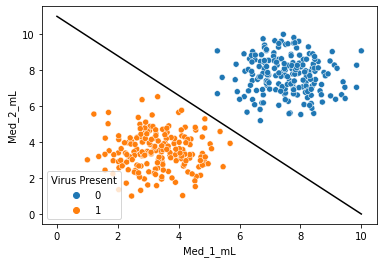

In [3]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

# hyperplane
x = np.linspace(0,10,100)
m = -1.1
b = 11
y = m*x+b

plt.plot(x,y,'black')

In [4]:
from sklearn.svm import SVC

In [5]:
# help(SVC)

In [6]:
y = df['Virus Present']

In [7]:
X = df.drop('Virus Present',axis=1)

In [8]:
model = SVC(kernel='linear',C=1000)

In [9]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary

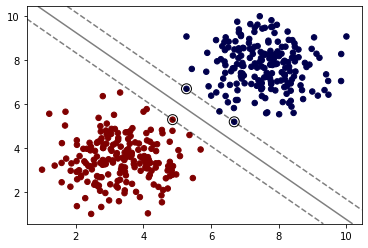

In [17]:
plot_svm_boundary(model,X,y)

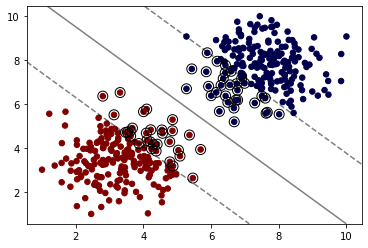

In [19]:
model = SVC(kernel='linear',C=0.005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

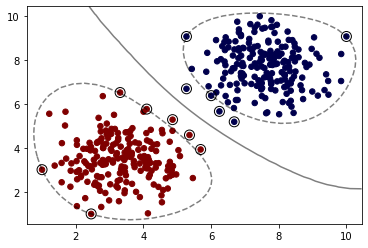

In [34]:
model = SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

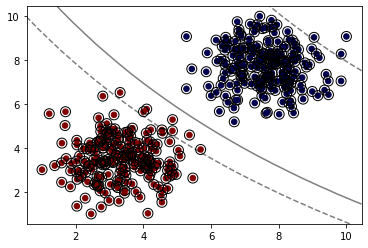

In [38]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

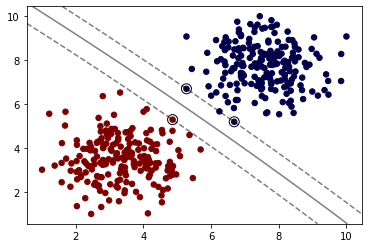

In [45]:
model = SVC(kernel='poly',C=4,degree=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [56]:
grid = GridSearchCV(svm,param_grid)

In [57]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [58]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}